In [1]:
from utils.logger import LogReader
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
lr = LogReader(reg='reg')
log_dir = '../Logs/script3'

data = lr.read_logs(log_dir, text=False)  # 读取日志

In [3]:
df = pd.DataFrame(data)
df = df[['reg', 'model', 'emsize', 'RMSE', 'MAE']]
# df = df[df['model'].isin(['PMF', 'SCoR+'])]
df = df[(df['reg'] < 1)]
df = df[(df['RMSE'] < 0.86) & (df['MAE'] < 0.68)]

df

,reg,model,emsize,RMSE,MAE
0,0.0,SCoR+,16,0.8367,0.6479
1,0.0,SCoR+,32,0.8308,0.6319
2,0.0,SCoR+,64,0.8231,0.6201
3,0.0,SCoR+,128,0.8228,0.6230
4,0.0,SCoR+,256,0.8143,0.6152
5,0.0,SCoR+,512,0.8071,0.6184
6,0.0,SCoR+,768,0.8074,0.6127
7,0.1,SCoR+,16,0.8325,0.6394
8,0.1,SCoR+,32,0.8291,0.6273
9,0.1,SCoR+,64,0.8203,0.6268


In [4]:
x = 'reg'
y_list = ['RMSE', 'MAE']

paper = {
    'PETER': {'RMSE': 0.81, 'MAE': 0.63, 'color': 'm'},
    'SVD++': {'RMSE': 0.80, 'MAE': 0.61, 'color': 'b'},
    'NRT':   {'RMSE': 0.79, 'MAE': 0.61, 'color': 'r'},
    'NETE':  {'RMSE': 0.79, 'MAE': 0.60, 'color': 'g'},
}

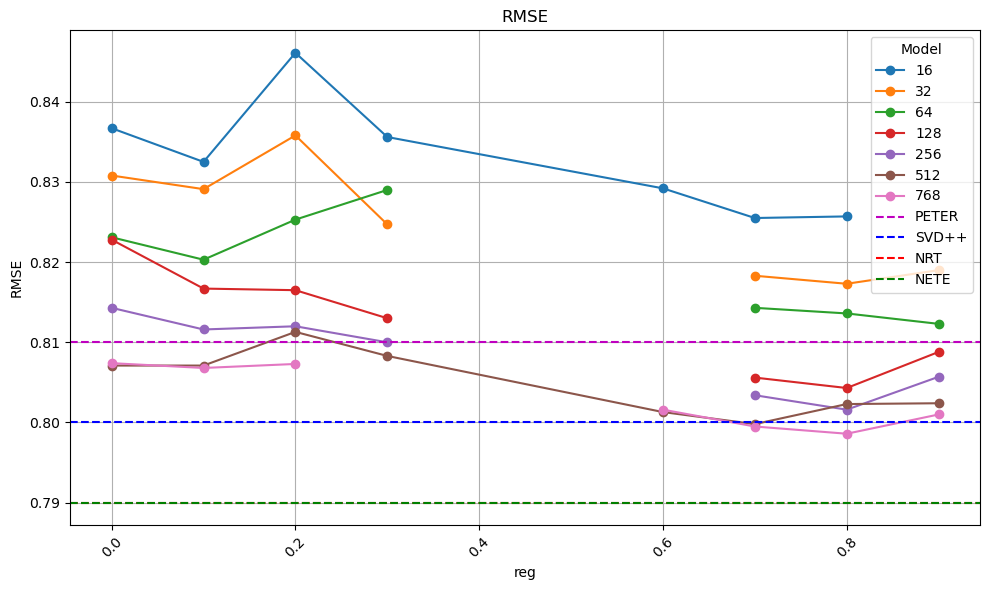

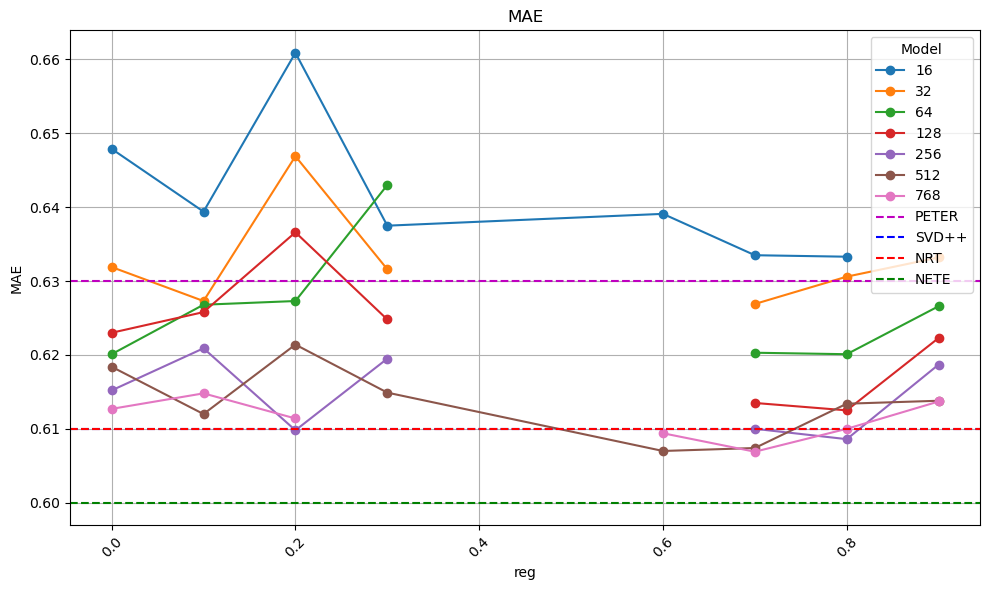

In [5]:
for y in y_list:
    # 使用 pivot 方法重塑数据，以标题作为列，时间戳作为索引
    df_pivot = df.pivot(index=x, columns='emsize', values=y)

    # 绘制折线图
    df_pivot.plot(kind='line', marker='o', figsize=(10, 6))
    for model, vals in paper.items():
        plt.axhline(y=vals[y], color=vals['color'], linestyle='--', label=model)

    # 设置图形属性
    plt.title(y)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.legend(title='Model')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # 显示图形
    plt.show()